# Chapter 04 Exercises Answer Key

# Total time: 7 hours

In [70]:
# Write the code for the libraries you use to complete the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Q1) Learning How to Solve Systems of Equations in Python

In economics, we often want to know the solution to equilibrium values. Take for example the table below from pg. 76 in the book.

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Production function     | $Y \text{ = } \bar{A}K^{1/3}L^{2/3}$ | 
| Rule for hiring capital | $\frac{1}{3}\cdot \frac{Y}{K} \text{=} r \space$ |
| Rule for hiring labor   | $\frac{2}{3}\cdot \frac{Y}{L} \text{=} \omega$ |
| Demand $=$ Supply for capital | $K = \bar{K}$ |
| Demand $=$ supply for labor | $L = \bar{L}$ |

In this case there are 5 equations and 5 unknowns. From the reading you learned the equilibrium in this simple economy is the solution to these equations.

In Python, it is possible to solve a system of two or more equations. As preparation for exercises in this assignment and future assignments you will learn how to solve a system of equations in Python. Follow the steps below to complete this exercise. 

**Review of Linear Algebra** 

In Econ 215 you learned the following formula can be used to find unknowns of a system of equations.
$$
Ax = b \ \ \ \ \ \ (1)
$$

The equation (1) can be manipulated and solved using rules from linear algebra to arrive at the following equation.
$$
x = A^{-1} b \ \ \ \ \ (2)
$$

Equation (2) says that the unknowns to a system of equations can be solved for by taking the inverse of matrix A and multiplying it by the constants of an equation. 


 **Video**

With those formulas in mind, watch the following video as it will teach you how to solve systems of equations in Python. 
    
__[Click here to watch video]( https://youtu.be/44pAWI7v5Zk)__

  

**Solve the Equations**

Using the information from the video solve the 1. and 2. below using Python.


__(a)__

\begin{align*}
3x - y &= 7 \\
2x + 3y &= 1 
\end{align*}

In [16]:
A = np.array([[3, -1], [2, 3]])
b = np.array([7, 1])

z = np.linalg.solve(A, b)
print(z)

[ 2. -1.]


__(b)__

\begin{align*}
x - 2y + 3z &= 7\\
2x + y + z &= 4\\
-3x + 2y - 2z &= -10
\end{align*}


In [17]:
A = np.array([[1, -2, 3], [2, 1, 1], [-3, 2, -2]])
b = np.array([7, 4, -10])

z = np.linalg.solve(A, b)
print(z)

[ 2. -1.  1.]



# The Black Death (Q2 and Q3)

In the middle of the fourteenth century, and epidemic known as the Black Death killed about a third of Europe's population, about 34 million people. While this was an enormous tragedy, the macroeconomic consequences might surprise you: over the next century, wages are estimated to have been *higher* than before the Black Death. Questions 2 and 3 will help you gain an understanding as to why this happened.



## Q2) Solving the production model

Before answering any questions about the Black Death, let's first build an understanding of the production function. Suppose the production function is given by $ Y = \bar{A}K^{\alpha}L^{1-\alpha}$. This is a general version of the production function we've been working with, where $\alpha$ is the "capital share of output." 

**(a)** Using pencil and paper (you don't have to enter the answer here), create a new version of Table 4.1 (pg. 76) for the model using this more general production function. What are the five equations and five unknowns? (*Hint*: The hiring rules for capital and labor will change in the obvious way.)

### Answer:


* MPK: $
\frac{\partial Y}{\partial K} = \alpha \ \bar{A} K^{\alpha - 1} L ^{1 - \alpha} = \alpha \frac{\bar{A}K^\alpha L^{\alpha - 1}}{K} = \alpha \frac{Y}{K}
$

* MPL: $
\frac{\partial Y}{\partial L} = (1 - \alpha) \bar{A}K^{\alpha}L^{1 - \alpha - 1} = (1 - \alpha) \bar{A}K^{\alpha}L^{1 - \alpha}L^{-1} = (1 - \alpha)\frac{Y}{L}
$




| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Production function     | $Y \text{ = } \bar{A}K^{\alpha}L^{1 - \alpha}$ | 
| Rule for hiring capital | $\alpha\cdot \frac{Y}{K} \text{=} r \space$ |
| Rule for hiring labor   | $1 - \alpha \frac{Y}{L} \text{=} \omega$ |
| Demand $=$ Supply for capital | $K = \bar{K}$ |
| Demand $=$ supply for labor | $L = \bar{L}$ |

**(b)** What is the solution for the equilibrium level of output per person? Let $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$. (Use python! You should verify your findings by hand.)

In [17]:
# Defining variables to then be used in calculations
A = 1
L = 200
K = 200
alpha = 1/3



# Defining a function that returns the value of the production function
def cobb_doug(A, K, L, alpha):
    Y = A * pow(K, alpha) * pow(L, 1 - alpha)
    return Y

# Call the function Y, the produciton function
Y = cobb_doug(A, L, K, alpha)
print('Output:', '{0:.2f}'.format(Y))


# Define a function for the MPK
def mpk(alpha, Y, K):
    r = alpha * (Y / K)
    return r

# Call the funcion mpk to get the MPK
r = mpk(alpha, Y, K)
print('MPK:', '{0:.2f}'.format(r))


# Define a function for the MPL
def mpl(alpha, Y, K):
    r = (1 - alpha) * (Y / L)
    return r

# Call the funcion mpl to get the MPL
w = mpl(alpha, Y, L)
print('MPL:', '{0:.2f}'.format(w))

supply_for_capital = K
supply_for_labor = L
print('Supply for Capital:', K)
print('Supply for Labor:', L)



Output: 200.00
MPK: 0.33
MPL: 0.67
Supply for Capital: 200
Supply for Labor: 200


**(d)** How does changing the level of alpha ($\bar{A}$) affect the equilibrium level of output, rental rate of capital, and wages? Try $\bar{A}$={0.5, 0.75, 1.25, 1.5}

In [18]:
# Defining variables to then be used in calculations
A = np.array([0.5, 0.75, 1.25, 1.5])
L = 200
K = 200
alpha = 1/3

for i in range(0, 4):
    print("When A = ", A[i])
    Y = cobb_doug(A[i], L, K, alpha)
    print('Output:', '{0:.2f}'.format(Y))

    r = mpk(alpha, Y, K)
    print('MPK:', '{0:.2f}'.format(r))

    w = mpl(alpha, Y, L)
    print('MPL:', '{0:.2f}'.format(w), '\n')

When A =  0.5
Output: 100.00
MPK: 0.17
MPL: 0.33 

When A =  0.75
Output: 150.00
MPK: 0.25
MPL: 0.50 

When A =  1.25
Output: 250.00
MPK: 0.42
MPL: 0.83 

When A =  1.5
Output: 300.00
MPK: 0.50
MPL: 1.00 



 Output, MPK , and MPL are proportional to $A$.

## Q3) 

  **(a)** Show numerically how much wages would rise if a third of the population died from disease. Assume $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$, $Y = \bar{A}K^{1/3}L^{2/3}$ before the black plague.

In [19]:
A = 1
L = 200
K = 200
alpha = 1/3

Y = cobb_doug(A, K, L, alpha)
mpl_before = mpl(alpha, Y, L)
print('The inital wage would be: ', '{0:.2f}'.format(mpl_before))

L = 2/3 * L
Y = cobb_doug(A, K, L, alpha)
mpl_after = mpl(alpha, Y, L)
print('The wage after the black plauge would be: ', '{0:.2f}'.format(mpl_after))
print('The difference is: ','{0:.2%}'.format( (mpl_after - mpl_before) / mpl_before))


The inital wage would be:  0.67
The wage after the black plauge would be:  0.76
The difference is:  14.47%


**(b)** Suppose that instead of the black plague there was an alien invasion of Europe that didn't kill anyone, but instead brought in new technology. How much would TFP have to increase to raise wages as much as the black plague? 

In [33]:
A = 1
L = 200
K = 200
alpha = 1/3
wage_black_plague = 0.76 # found it in part a)

# Setting up algorigthm

epsilon = 0.00001 # algorithm stopping tolerance
error = 1 # initial value for the error

while error>epsilon:
    Y = cobb_doug(A, K, L, alpha)
    wage = mpl(alpha, Y, L)
    error=wage_black_plague- wage
    A=A + error*0.01

print('Alien TFP:','{0:.2f}'.format(A) )
print('Wage: ', round(wage, 4))


Alien TFP: 1.14
Wage:  0.76


# Q5) The empirical fit of the production model

The table on page 99 of the book (or shown below in the Pandas data frame) reports per capita GDP and capital per person in the year 2014 for 10 countries. __Your task is to fill in the missing columns of the data frame by completing steps a) thorugh d).__

In [52]:
# Run this code to create the data frame!
countries = ['United States', 'Canada', 'France', 'Hong Kong', 'South Korea', 'Indonesia', 'Argentina', 'Mexico', 'Kenya', 'Ethiopia']
capital_per_person1 = [141841, 128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227]
per_capita_GDP2 = [51895, 43367, 37360, 45095, 34961, 9797, 20074, 15521, 2971, 1505]
capital_per_person3 = [1.0, '', '', '', '', '', '', '', '', '']
per_capita_GDP4 = [1.0, '', '', '', '', '', '', '', '', '']
predicted_y = [1.0, '', '', '', '', '', '', '', '', '']
implied_TFP = [1.0, '', '', '', '', '', '', '', '', '']

df = pd.DataFrame({'Country(0)':countries, 
                   'Capital per person(1)':capital_per_person1, 
                   'Per capita GDP(2)':per_capita_GDP2, 
                   'Capital per person(3)':capital_per_person3, 
                   'Per capita GDP(4)':per_capita_GDP4, 
                   'Predicted y*(5)':predicted_y, 
                   'Implied TFP(6)':implied_TFP}, columns=['Country(0)', 'Capital per person(1)', 'Per capita GDP(2)', 'Capital per person(3)', 'Per capita GDP(4)', 'Predicted y*(5)', 'Implied TFP(6)'])
df


,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1,1,1,1
1,Canada,128667,43367,,,,
2,France,162207,37360,,,,
3,Hong Kong,159247,45095,,,,
4,South Korea,120472,34961,,,,
5,Indonesia,41044,9797,,,,
6,Argentina,53821,20074,,,,
7,Mexico,45039,15521,,,,
8,Kenya,4686,2971,,,,
9,Ethiopia,3227,1505,,,,


**(a)** Given the values in columns 1 and 2 which are in U.S. dollars, fill in columns 3 and 4 which are relative to U.S. values (U.S. = 1). That is, compute per capita GDP and capital per person relative to the U.S. values taking the ratio of each country's value (either Per capita GDP or Capital per Person) to the corresponding US value. 

In [54]:
k_relative=df['Capital per person(1)'] / df['Capital per person(1)'][0]
df['Capital per person(3)'] = k_relative

y_relative=df['Per capita GDP(2)'] / df['Per capita GDP(2)'][0]
df['Per capita GDP(4)']=y_relative


df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1,1
1,Canada,128667,43367,0.907121,0.835668,,
2,France,162207,37360,1.143583,0.719915,,
3,Hong Kong,159247,45095,1.122715,0.868966,,
4,South Korea,120472,34961,0.849345,0.673687,,
5,Indonesia,41044,9797,0.289366,0.188785,,
6,Argentina,53821,20074,0.379446,0.386820,,
7,Mexico,45039,15521,0.317532,0.299085,,
8,Kenya,4686,2971,0.033037,0.057250,,
9,Ethiopia,3227,1505,0.022751,0.029001,,


**(b)** In column 5, use the production model (with $\alpha=1/3$) to compute predicted per capita GDP for each country relative to the United States. Assume $\bar{A}=1$, which implies there are no TFP differences across countries. This implies the production function is $y^\ast = \bar{A}k^{1/3}$.

In [55]:
A = 1
k = df['Capital per person(3)']

# define the intentive form C-D production function
def prod_func(A, k):
    USA_capital = k[0]
    column_5 = (A * pow(k, 1/3)) / (A * pow(k[0], 1/3))
    return column_5

y = prod_func(A, k)

df['Predicted y*(5)'] = y
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1
1,Canada,128667,43367,0.907121,0.835668,0.968029,
2,France,162207,37360,1.143583,0.719915,1.045737,
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,
4,South Korea,120472,34961,0.849345,0.673687,0.947025,
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,
6,Argentina,53821,20074,0.379446,0.386820,0.723963,
7,Mexico,45039,15521,0.317532,0.299085,0.682227,
8,Kenya,4686,2971,0.033037,0.057250,0.320873,
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,


**(c)** In column 6, compute the level of TFP that is needed so that the Predicted y* (5) matches Per capital GDP (4)


In [46]:
A=df['Per capita GDP(4)'] / df['Predicted y*(5)']
df['Implied TFP(6)'] = A
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1.000000
1,Canada,128667,43367,0.907121,0.835668,0.968029,0.863268
2,France,162207,37360,1.143583,0.719915,1.045737,0.688428
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,0.836077
4,South Korea,120472,34961,0.849345,0.673687,0.947025,0.711372
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,0.285420
6,Argentina,53821,20074,0.379446,0.386820,0.723963,0.534308
7,Mexico,45039,15521,0.317532,0.299085,0.682227,0.438395
8,Kenya,4686,2971,0.033037,0.057250,0.320873,0.178420
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,0.102348


**(d)** Comment on the general results you find.

Answers may vary

## Q6) The labor share and Cobb-Douglas production (a FRED question)

Download the FRED `ch04_labor_compensation.csv` file (see 6(a) code comments) for the share of income paid to labor for the nonfarm business sector of the U.S. economy, back to 1950. (For an introduction to FRED, see the case study "The FRED database" in Chapter 2 on page 34).

**(a)** Create a time series plot of the data you downloaded.

_Hint:  For the plotting consider using the pandas function df.plot where df is the name of your data frame._



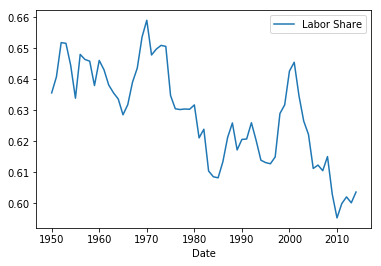

In [112]:
# Link: https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch04_labor_compensation.csv

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch04_labor_compensation.csv", header=0,names = ['Date','Labor Share'], index_col=0)
df.index = pd.DatetimeIndex(df.index).year # Converts dd-mm-yyyy dates to yyyy format only.
df.plot()





**(b)** The graph most likely shows an index (e.g., normalized so the value in some year is 100) rather than the share itself. Assuming the labor averaged $2/3$, approximately what value is the labor share for your most recent data point?

In [110]:
df.iloc[[-1]]

,Labor_Share
Date,
2014,0.603597


**(c)** What does this graph suggest about the validity of our assumptions that the production function is Cobb-Douglas?

The assumption that the labor share is constant is an oversimplification. The data shows more variation than suggested by the model. However, on average, the assumption of constant labor share is not too far from reality. In our case, where we are making cross-country comparisons, adding a labor share that is changing over time will lead to different yearly estimates for TFP. Unless our aim is to get a time series for TFP, I think that our development accounting exercise doesn't need to include more than a constant labor share.